# NET ID: SOLUTIONS

# Lecture 8: Linear Classifiers and Model Validation

##### This week we're introducing linear classifiers, namely the **Perceptron**, and then delving deeper into **Model Validation**.

### Excercises 1, 2, 3, 5, and 6 are required. Exercises 4, 7, 8, and 9 are optional.

That's a little more than we normally have, so as long as you get _most_ of the notebook correct, you'll receive full score on this assignment.

## Perceptron

Perceptron was developed by American psychologist Frank Rosenblatt in 1957 at the **Cornell** Aeronautical Laboratory. Shout-out to one of our greatest alumni!

Perceptron is a linear binary classifier. So the underlying assumption about the dataset is that there are two labels - i.e. binary labels (conventionally, +1 and -1), and that the two classes should be classified with a linear hyperplane (Although, keep in mind that the [Multi-Layer Perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron) is applicable to non-linearly separable data. We won't cover MLP in this course as it is part of Artificial Neural Networks (ANN), which is not in our scope).


The Perceptron "learns" a series of weights, each of which corresponds to each input feature, i.e. X of our data. For example, we are given a dataset of dog and cat. The input feature set consists of three columns: weight $x_1$, height $x_2$, and length $x_3$ of each animal. Then Perceptron will keep track of three different weights: $w_1$, $w_2$, and $w_3$. Each pair of input features and weights is multiplied and summed up: $s = w_1*x_1 + w_2*x_2 + w_3*x_3$. If the summed-up result $s$ is greater than a certain threshold, then we predict one class, and if it is less than the threshold, then we predict the other. For example, if our threshold is 0, then we can set it as: if $s > 0$, then the given input feature is a description of (+1) label (i.e. a dog), and if $s < 0$, then it is (-1) label (i.e. a cat). Then Perceptron will check if the predictions made were correct. If some of them were not, then the weights are updated accordingly. This process continues for a certain number of "epochs," or iterations. The end goal is to classify every point correctly by finding a *perfect* linear hyperplane.

The final step is to check if our predictions were classified correctly. If they were not, then the weights are updated using a learning rate. This process continues for a certain number of iterations, known as “epochs.” The goal is to determine the weights that produce a linear decision boundary that correctly classifies the predictions.

<img src="https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png" alt="perceptron.png" style="width: 50%;"/>

## Demo: Perceptron Learning Algorithm
This algorithm is simple and provides a great intuition for how to use your data to find a great linear binary classifier. The perceptron algorithm is an __iterative__ algorithm. This means that we will constantly update our classifer __w__ until it performs well on our training data. Intuitively, we want use the points that our incorrectly classifies to help develop a better classifer. Lets see how our model improves across iterations:

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Plots our data points and Classifier
def plot_perceptron(w):
    plt.scatter(X[:,0], X[:,1], color = c)
    left = min(X[:,0])
    right = max(X[:,0])
    if w[2] != 0:
        plt.plot(np.linspace(left, right, num=50), [-(w[2] + w[0]*x)/w[1] for x in np.linspace(left, right, num=50)])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron Learning Example')
    plt.xlim([-3,3])
    plt.ylim([-4,4])
    plt.show()
    plt.close()

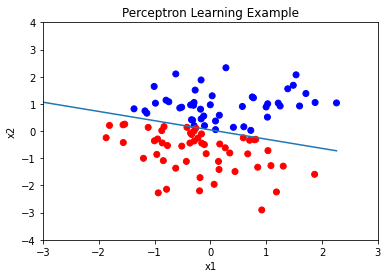

In [3]:
n = 100 # number of data points
X = np.random.randn(n,2) 
offset = np.ones((n,1))
X = np.hstack((X, offset))
w_true = np.random.randn(3,1) 

y = np.sign(X.dot(w_true))
c = []
for i in range(n):
    if y[i] > 0:
        c.append('r')
    else:
        c.append('b')
plot_perceptron(w_true)

#### As you can see above, our goal is to find the line above that linearly separates our blue data points from our red data points. Let's use the perceptron algorithm to do this:

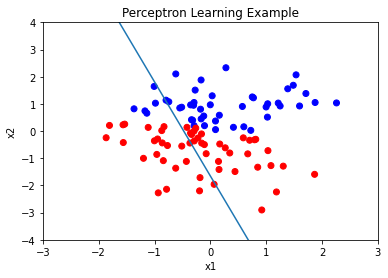

In [4]:
#initialize random normal vector w
w = np.random.randn(3)
#function that returns the index of a point that is missclassifed
def find_missclassified(w):
    for it in range(10000):
        i = np.random.randint(0, n) 
        if y[i]*(X[i,:].dot(w)) <= 0:
            return i
    return None
plot_perceptron(w)

37
Updating perceptron


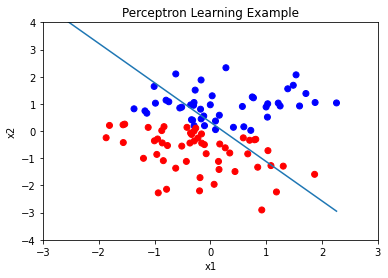

In [5]:
#Run this cell once at a time to see how our classifier improves at each iteration
point = find_missclassified(w)
print(point)
if point is None:
    print("Perfect Classifier!!!")
    plot_perceptron(w)
else:
    print("Updating perceptron")
    w = w + y[point]*X[point, :]
    plot_perceptron(w)

Slowly but surely our classifier is getting better! The intuition behind the perceptron is that we use the incorrectly classified points to change __w__ in order to make better guesses.

## Example 1: Perceptron Learning

Let's create a perceptron to predict whether someone has breast cancer. This is no different from what you've done with models before, but we're going to write our code inside a function so we can reuse it later.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

"""
test_size: a float between 0 and 1 indicating the size of the train set
"""
def classifier_accuracy(classifier, features, goal, n_training_points, n_testing_points=None):
    
    if n_training_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of training points requested is greater than length of dataset")
    if n_training_points <= 0:
        raise ValueError("bad input to classifier_accuracy: number of training points requested must be greater than 0")
    
    if n_testing_points is None:
        n_testing_points = len(goal) - n_training_points
    
    if n_testing_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of testing points requested is greater than length of dataset")
    if n_testing_points < 0:
        raise ValueError("bad input to classifier_accuracy: number of testing points requested must be greater than 0")
    
    if n_training_points + n_testing_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of training + testing points requested is greater than length of dataset")
    
    n_total_points = n_training_points + n_testing_points
    
    if n_training_points + n_testing_points < len(goal):
        indices = np.random.choice(len(features), n_total_points)
        features = features[indices,:]
        goal = goal[indices]
    
    test_size = n_testing_points / n_total_points
    
    ###############################################################################
    ##### Don't touch anything in this cell above this line! Only add code below.
    ###############################################################################
    
    #FILL HERE: Make a train test split with a test size of test_size
    X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size=test_size) 

    #FILL HERE: train the classifier
    classifier.fit(X_train,y_train) 

    #FILL HERE: Compute your model's train and test accuracy using accuracy_score
    train_accuracy = accuracy_score(classifier.predict(X_train),y_train) 
    test_accuracy = accuracy_score(classifier.predict(X_test),y_test) 
    
    return train_accuracy, test_accuracy 


X, y = load_breast_cancer(return_X_y=True)
# we train on 400 of the ~500 data points, equivalent to 20% test set
train, test = classifier_accuracy(Perceptron(), X, y, 400) 
print("train accuracy:\t", train)
print("test accuracy:\t", test)


train accuracy:	 0.905
test accuracy:	 0.8994082840236687


# Example 2: Data Limitations of Cross Validation Pt. 1 - Train Size

Cross validation is an extraordinarily powerful technique and is used in almost every supervised learning problem. But, it does have its limitations -- some problems are inherent to supervised learning, and cross validation can't fix those issues.

One such limitation has to do with the size of the train set (i.e. how many points we pass into `model.fit`). Let's explore this limitation.

The code block below may include Python constructs that you're not familiar with. That's okay -- **we don't expect you to be able to understand all the code**, and that's not the point of this example. Just **set n_training_points** by replacing "FILL IN HERE", and **analyze the average accuracy** outputted. If you get an error, read the error message and change your number accordingly.

**Make sure to try both small (single digits) and big (triple digits) values of n_training_points!**

In [7]:
X, y = load_breast_cancer(return_X_y=True)

# TODO try setting n_training_points to a few different numbers. If you get an error, read the error message and change your number accordingly.
n_training_points = 300 

n_testing_points = 100
accs = []
for i in range(1000):
    for _ in range(50):
        try:
            train_acc, test_acc = classifier_accuracy(Perceptron(), X, y, n_training_points, n_testing_points)
            accs.append(test_acc)
            break
        except ValueError as e:
            if "bad input to classifier_accuracy:" in str(e):
                raise e
            continue

print("avg. accuracy:", round(np.mean(accs),4))


avg. accuracy: 0.846


## Analysis

##### What is the relationship between # of training points and average accuracy?


A smaller training set generally corresponds to a lower accuracy. At train sizes below ~100, the accuracy drops significantly.

# Example 3: Data Limitations of Cross Validation Pt. 2 - Test Set Size

What about test size (i.e. how many points we pass into our scoring function)? Do we also need a large test set?

Let's see what happens when we vary the size of the test set.

**In this problem, you will produce and analyze some scatterplots. We've provided most of the code; the bulk of your work will be in interpreting graphs.**

The dataset is about phone prices. We're trying to classify each phone into one of four price bins.

The following block of code loops through test sizes varying from from 5 points to 50 points (with a fixed number of training points). For _each_ of these test sizes, it runs classifier_accuracy 500 times and finds summary statistics of those 500 runs. Recall that this is similar to what we did with cross-validation, except instead of producing one value, we're looping through different test sizes and producing a value for each test size.

In [9]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

# setting up the configuration
num_iters_per_test_size = 500 # for each test size, we'll collect 500 accuracies
test_sizes = list(range(5,50,5))
cellphone_df = pd.read_csv("phone.csv")
goal = cellphone_df["price_range"]
features = cellphone_df.drop(columns=["price_range"]).to_numpy()

# will store summary statistics about train and test accuracy 
train_acc_stats = []
test_acc_stats = []
for test_size in test_sizes:
    tree = DecisionTreeClassifier()
    accs = [classifier_accuracy(tree, features, goal, 1500, test_size) for i in range(num_iters_per_test_size)]
    train_acc_stats.append(stats.describe([x[0] for x in accs])) # train accuracy statistics
    test_acc_stats.append(stats.describe([x[1] for x in accs])) # test accuracy statistics

In [10]:
"""
Pass in one of the following:
- "nobs"
- "min"
- "max"
- "mean"
- "variance"
- "kurtosis"

Returns two arrays: one for train accuracy statistics and one for test accuracy statistics.
For example, get_summary_statistics("mean") will return:
1) the cross-validation train accuracy for each test size in `test_sizes`
2) the cross-validation test accuracy for each test size in `test_sizes`
"""
def get_summary_statistics(summary_statistic_name):
    index = 0
    if summary_statistic_name == "nobs":
        index = 0
    elif summary_statistic_name == "min":
        index = 1
    elif summary_statistic_name == "max":
        index = 1
    elif summary_statistic_name == "mean":
        index = 2
    elif summary_statistic_name == "variance":
        index = 3
    elif summary_statistic_name == "kurtosis":
        index = 5
    elif summary_statistic_name == "constant":
        return [1 for i in train_acc_stats], [1 for i in test_acc_stats]
    else:
        return None, None
    train_statistics = [stat[index] for stat in train_acc_stats]
    test_statistics = [stat[index] for stat in test_acc_stats]
    if summary_statistic_name == "min":
        train_statistics = [minmax[0] for minmax in train_statistics]
        test_statistics = [minmax[0] for minmax in test_statistics]
    elif summary_statistic_name == "max":
        train_statistics = [minmax[1] for minmax in train_statistics]
        test_statistics = [minmax[1] for minmax in test_statistics]
    return train_statistics, test_statistics

Below is some starter code for producing the scatterplots. All you need to do is change "constant" to one of the following summary statistic names:
- "nobs"
- "min"
- "max"
- "mean"
- "variance"
- "kurtosis"

and that summary statistic will be graphed below for different test sizes.

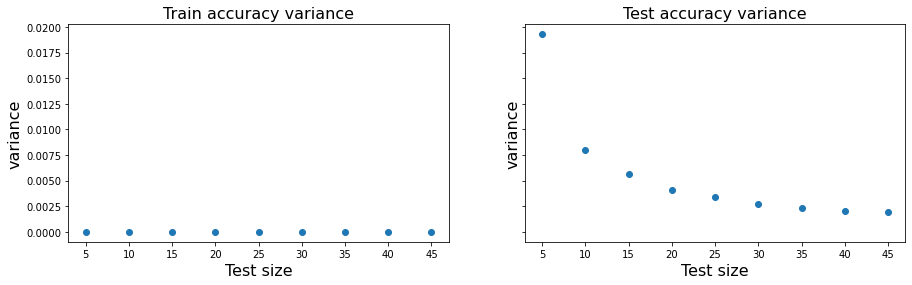

In [11]:
summary_statistic_name = "variance" 

train_yaxis, test_yaxis = get_summary_statistics(summary_statistic_name)

if train_yaxis is None:
    print("\"" + summary_statistic_name + "\" is not a valid statistic name! Make sure you spelled it correctly")
else:
    fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
    fig.set_figwidth(15)
    fig.subplots_adjust(hspace=0.5)
    # fig.
    axes[0].scatter(test_sizes,train_yaxis)
    axes[0].set_title("Train accuracy " + summary_statistic_name, fontsize=16)
    axes[0].set_xlabel("Test size", fontsize=16)
    axes[0].set_ylabel(summary_statistic_name, fontsize=16)

    axes[1].scatter(test_sizes,test_yaxis)
    axes[1].set_title("Test accuracy " + summary_statistic_name, fontsize=16)
    axes[1].set_xlabel("Test size", fontsize=16)
    axes[1].set_ylabel(summary_statistic_name, fontsize=16)

    plt.show()


## Analysis

##### Which is better, a small test set or a large test set? Why is it better? What could be causing this problem in small/large test sets?



With small test sets, the variance is extremely high. This makes it better to have large test sets, since we can rely on our result more. When variance is high, there is a large chance that the true accuracy is very different from the average accuracy that we measure.

You may also have talked about min, which is usually 0 for low test sizes and 1 for larger test sizes. This shows that at lower test sizes, we can get widely inaccurate accuracies, as we're only looking at outliers. At very low test sizes, there might even be some classes that don't appear in the test set at all!

As a side note, we can see that when we go from 40 to 45 testing points, we're still decreasing in variance, indicating that we want an even larger set than 45 points. Eventually we'll get "enough" testing points. For example, it probably wouldn't make much of a difference if we used 1500 testing points vs. 1600 testing points for this dataset. However, what "enough" is depends on each problem!

# Example 4: Application to final project (optional)

Try finding the variance of your accuracies for a model in your final project, just like in example 3.

# Example 5: Selection Bias in Cross Validation

Below, we use a decision tree to classify try to predict whether a phone both has talk time >= 20 and does not have 3G.

In [12]:
cellphone_df = pd.read_csv("phone.csv")
features = cellphone_df[['battery_power']]
goal = (cellphone_df["talk_time"] >= 20) & (cellphone_df["three_g"] == False)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from contextlib import suppress

accuracies, positive_predictive_values, negative_predictive_values = [],[],[]
n_folds = 10
kf = KFold(n_folds)
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = goal[train_index], goal[test_index]
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    
    #true negative, false positive, false negative, true positive
    tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[False,True]).ravel()
    
    accuracies.append((tn + tp) / len(y_test))
    if tp + fn > 0:
        positive_predictive_values.append(tp / (tp + fn))
    if tn + fp > 0:
        negative_predictive_values.append(tn / (tn + fp))
    
cv_accuracy = np.mean(accuracies)

print("Accuracy:", cv_accuracy)

Accuracy: 0.9765


That's an amazing accuracy! Now, let's look closer at our accuracy breakdown. 

We'll look at the **positive predictive value** and the **negative predictive value**. The positive predictive value is the accuracy score if we only look at samples with a true label of "True", and the negative predictive value is the accuracy score if we only look at samples with a true label of "False". 

So, the question _"Out of the phones that have a talk time >= 20 but don't have 3G, what percent do we predict correctly?"_ corresponds to the positive predictive value.

In [15]:
cv_positive_predictive_value = np.mean(positive_predictive_values)
cv_negative_predictive_value = np.mean(negative_predictive_values)

print("accuracy for positive samples",  cv_positive_predictive_value)
print("accuracy for negative samples", cv_negative_predictive_value)

accuracy for positive samples 0.0
accuracy for negative samples 0.9898311501391218


### Uh oh. We have a positive predictive value of 0%. How could this be, when our accuracy score is so high?

_Hint 1_: We use just `battery_power` to predict, and get a 98% accuracy. That seems wrong. How did our model have such a high accuracy? What contributed to that accuracy?

_Hint 2_: How do our predictions look? How does the goal look?

## Answer


There are almost no positive samples -- only 27 out of 2000 points are positive. So, our model can get 98% accuracy by predicting  

# Example 6: A Common Mistake

The following piece of code contains a (fatal) issue. Find it! (No need to correct the error -- just state what it is.)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

error = mean_squared_error(y_pred, y_test)

print("Error:", error)

Error: 0.07017543859649122


### What's wrong?

_Hint: Think about what error is appropriate to use in regression vs. classification problems._

Mean squared error is used for measuring regression error, not classification error!  

# Example 7: Model Complexity and Performance Measures

As our models get more complex, we often need to **adjust how we measure and report model performance**. In this example, we will investigate how model complexity affects our performance measures. We will use KNN Regressors, which use a very similar concept to KNN Classifiers, to predict the battery power of a phone.

## Hypothesis: What happens to our performance measures when models get more complex?

The instructors already know the answer, so it'd kind of be cheating if they made a hypothesis. 

## Experimentation

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
# use just 500 data points to help make this demo have more obvious results
cellphone_df = pd.read_csv("phone.csv").sample(n=500, random_state=42).reset_index()
goal = cellphone_df["battery_power"]

# we need to scale for KNN
simple_features = scale(cellphone_df[["blue","ram"]])
complex_features = scale(cellphone_df.drop(columns=["index","battery_power","price_range","fc","n_cores","m_dep"]))

#### A simple model

Create a [KNN Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Then, 15-Fold cross validation to measure the accuracy (look at the examples near the bottom of [KFold's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) for reference). 

In addition to calculating the average of the accuracies on each fold, also calculate the variance of those accuracies.

In [19]:
# create a KNN regressor that uses 10 neighbors
knnReg = KNeighborsRegressor(10) 

# create KFold object with 15"splits".
kf = KFold(15) 

simple_errors = []
# follow examples to iterate through folds. Use saimple_features here, so that we create a simpler model
for train_index, test_index in kf.split(simple_features): 
    X_train, X_test = simple_features[train_index], simple_features[test_index] 
    y_train, y_test = goal[train_index], goal[test_index] 
    # fit the regressor
    knnReg.fit(X_train, y_train) 
    # use mean_squared_error to get the mse
    mse = mean_squared_error(y_test, knnReg.predict(X_test)) 
    # append accuracy on this fold to the "simple_errors" list
    simple_errors.append(mse) 

# calculate and print out the average mse and the variance of the mse
print("average accuracy:", np.mean(simple_errors)) 
print("variance of accuracies:", np.std(simple_errors)) 


average accuracy: 207416.4543868093
variance of accuracies: 28929.910947152064


##### A complex model

Do the same thing as above, but use complex_features instead of simple_features

In [20]:
# create a KNN regressor that uses 10 neighbors
linReg = KNeighborsRegressor(10) 

# create KFold object with 15 "splits".
kf = KFold(15) 

complex_errors = []
# follow examples to iterate through folds. Use complex_features here, so that we create a more complex model
for train_index, test_index in kf.split(complex_features): 
    X_train, X_test = complex_features[train_index], complex_features[test_index] 
    y_train, y_test = goal[train_index], goal[test_index] 
    # fit the regressor
    knnReg.fit(X_train, y_train) 
    # use mean_squared_error to get the mse
    mse = mean_squared_error(y_test, knnReg.predict(X_test)) 
    # append mse on this fold to the "complex_errors" list
    complex_errors.append(mse) 
# calculate and print out the average mse and the variance of the mse
print("average accuracy:", np.mean(complex_errors)) 
print("variance of accuracies:", np.std(complex_errors)) 


average accuracy: 207191.73695662507
variance of accuracies: 50619.838401958405


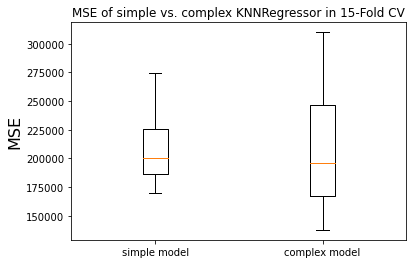

In [21]:
plt.boxplot([simple_errors, complex_errors],labels=["simple model","complex model"])
plt.ylabel("MSE",fontsize=16)
plt.title("MSE of simple vs. complex KNNRegressor in 15-Fold CV")
plt.show()


# Analysis

#### Let's compare the simple and complex models. What did you observe about the mean?


The mean is around the same for both models. 

#### What did you observe about the variance?


The variance for the more complex model is much larger. 

#### What could cause these results?


The complex model is overfitting; that is, it's too sensitive to small (irrelevant) changes in the data. . 

#### Describe a situation in which a model with lower accuracy is more desirable than a model with higher accuracy. Be as specific as possible.


In this specific case, I would almost always choose the simple model, since we have a better idea of how well it performs. Even if there were a larger difference in the accuracies, we might still choose a model with higher error but lower variance if we're most interested in beating some kind of threshold. For example, if I were building a model that is required, by law, to have an MSE under 27500, then I might not care how much better than 27500 I do -- I just need to make sure I do better than 27500 requirement. We could say that the simple model we just built satisfies that constraint. On the other hand, the complex model has a pretty high chance of having an MSE over 27500. So even though the complex model has a lower average MSE, we can't risk the possibility that the complex model's MSE is actually very high.   

## Further Musings
So, we've encountered an issue with how we've been measuring performance, especially with complex models. 

#### How could we address this issue? How can we give a more holistic report of a model's performance?

(This part is graded on completion and effort.)


Rather than reporting averages, we could report **confidence intervals**. For example, _"We ran 50 folds of cross validation, and out of those 50 folds, 48 folds had an accuracy between 0.85 and 0.9"_. This could be simplified to _"Our model has a 96% chance to have an accuracy between 0.85 and 0.9"_, where 96% comes from 48/50=96% of our folds falling in that 0.85-0.9 interval.

There are some issues with these kinds of confidence intervals, but we won't discuss those in this class. As you continue with machine learning, you'll learn better ways of reporting model accuracy.

# Example 8: Model Complexity and Train Size (optional)

Turns out, **_model complexity plays a role in choosing the train set size_**. Take some time to explore this concept. An outstanding solution would have:
- A **Hypothesis**: As model complexity changes, how does the effectiveness of a fixed-size train set change? What happens if a model goes from super uncomplex to moderately complex? In a sentence or two, why do you believethis?
- A **Brief Plan** (methodology) of how you'll explore/demonstrate the interaction between model complexity and train set size. How are you controlling complexity? How are you measuring the effectiveness of a train set? According to your hypothesis, what would you expect to see? If your hypothesis is wrong, what results might we see?
- **Implementation + Results**: Implement the methodology you described above. Write code that tries out different model complexities and different test sizes. Either print out results or produce graphs (e.g. scatterplots).
- **Conclusion**: Analyze the results. What parts of your hypothesis were correct? What parts of your hypothesis were incorrect?
- **Further Research**: Form a few new hypotheses for (hypothetical) further research: why might there exist such a relationship between model complexity and train set size? What else would be useful to know about this relationship? Also, what experiments could you do to test these hypotheses.
- **Error analysis**: Is there anything you didn't take into account? What could have caused your expirement to have erroneous results?
- **Takewaways**: So, why did we do all that experimentation? Now that we understand the relationship between complexity and train size, how can you apply this knowledge to your final project?
- An attempt to answer this **bonus question**: What if the train set is infinitely large? Briefly explain your reasoning. After you've written your answer, feel free to look up the answer (this is a bonus question, so that's okay!).

For this problem, it's advised to use just one type of model; for example, you could use just linear regressions or just decision trees.

< FILL IN HERE >

In [22]:
# < FILL IN HERE >

###### **A note on real-world applications:** 
Most of the time, model complexity is tunable while dataset size is not. So, instead of changing train size to fit the model you want, you're usually going to be changing model complexity to fit the train size that you're stuck with.

# Example 9: Bootstrap for Measuring Variability (optional)

You can use the bootstrap to estimate the variability of a model. Here, we'll implement a simple calculation of the variability of a model.

We'll create two linear regressions: a simple one (uses 1 feature) and a complex one (uses 5 features). Then calculate the variances of their intercepts. We used phone.csv, but feel free to use another dataset if you'd prefer.

Make sure all your cells are run before submitting so we can see all of the output!

### a. Choose a dataset
This can be a dataset from earlier in this notebook. Or, you could use your final project dataset!

By the way, we probably won't have your data when looking at your solutions, so please make sure all your cells are run we can see the outputs.

### b. Measure variability
Use [np.random.choice](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) to create the bootstrap datasets.

Note that you shouldn't use train_test_split anywhere in this problem, since we don't care about accuracy.

In [23]:
from sklearn.linear_model import LinearRegression

model_simple = LinearRegression()
model_complex = LinearRegression()

# set up any other variables you need

for iter in range(100): # we'll start out with 100 iterations. Feel free to do more or less iterations if you want
    # create the bootstrap train data. feel free to create any additional variables that you need
    
    
    # fit the simple model using one feature
    model_simple.fit(bootstrap_X_simple, bootstrap_y)
    
    # fit the complex model using that one feature + four more features
    model_simple.fit(bootstrap_X_complex, bootstrap_y)
    
    # update any variables you need to update

# for each of the two regressors, display the variability of its intercept



NameError: name 'bootstrap_X_simple' is not defined

### c. Interpret Results

Was the variance different between the simple and complex models? If so, what feature(s) contributed the most to the difference in variance? If not, what could've caused the variances to be similar?

< FILL IN HERE >